# **Table of Contents:**
1. Introduction
2. Key Concepts

* Time Series Analysis

 * Stationarity

 * Trend Analysis

 * Seasonality

 * Autocorrelation

 * Decomposition

* Time Series Forecasting

  * Moving Averages

 * Exponential Soothing

 * ARIMA

 * SARIMA

 * Seasonal Decomposition of Time Series (STL)
** Time series forecasting** is a technique used to predict future values of a variable based on its historical data points, where the data points are ordered
and equally spaced in time. In time series forecasting, the objective is to analyze patterns, trends, and dependencies within the data to make accurate
predictions for future time points.
The key idea behind time series forecasting is that the future values of a variable can be influenced by its past values and other factors such as
seasonality, trends, and cyclical patterns. By understanding these patterns and relationships, we can develop models that capture the underlying
dynamics of the time series and use them to forecast future values.
Time series forecasting is widely used in various domains, including finance, economics, sales and demand forecasting, weather prediction, stock
market analysis, resource planning, and many others. It provides valuable insights for decision-making, helps in understanding the behavior of the timedependent variable, and aids in planning and strategizing based on anticipated future values.
Different methods and models can be employed for time series forecasting, ranging from simple statistical techniques such as moving averages and
exponential smoothing to more advanced methods like autoregressive integrated moving average (ARIMA), seasonal decomposition of time series
(STL), and machine learning algorithms such as random forests, support vector machines, and neural networks.
The choice of the forecasting method depends on the characteristics of the time series data, the presence of seasonality and trends, the available
historical data, and the specific requirements of the forecasting problem.

# Key Concepts to Learn

**10 concepts and techniques you should learn:**
1. **Time Series Analysis:**Gain a solid understanding of the basic principles and concepts of time series analysis. This includes stationarity, trend
analysis, seasonality, autocorrelation, and decomposition.
2. **Forecasting Methods:** Learn a range of forecasting methods and models, including moving averages, exponential smoothing, ARIMA, SARIMA,
seasonal decomposition of time series (STL), state space models, and machine learning-based approaches.
3. **Data Preparation:** Master techniques for handling time series data, such as handling missing values, handling outliers, and dealing with irregularly
spaced data. Understand how to transform data if necessary, such as differencing to achieve stationarity.
4. **Model Selection and Evaluation:**Understand how to choose an appropriate forecasting model for a given time series problem. Learn about model
evaluation metrics such as mean squared error (MSE), mean absolute error (MAE), root mean squared error (RMSE), and others.
5. **Seasonality and Trends:** Explore techniques for detecting and handling seasonality and trends in time series data. Learn about methods such as
seasonal decomposition, seasonal adjustment, and trend modeling.
6. **Advanced Techniques:** Familiarize yourself with more advanced forecasting techniques, such as state space models (e.g., Kalman filters),
dynamic regression models, vector autoregression (VAR), neural networks (e.g., LSTM), and ensemble methods.
7.**Model Diagnostics:** Develop skills in diagnosing the quality of forecasting models by analyzing residuals, checking for model assumptions, and
conducting statistical tests.
8. **Time Series Visualization:** Learn to visualize time series data effectively using plots such as line plots, scatter plots, autocorrelation plots, and
seasonal subseries plots. Visualization aids in understanding patterns and identifying potential forecasting models.
9. **Forecasting Software and Libraries:**Get hands-on experience with popular time series forecasting software and libraries such as Python's
statsmodels, scikit-learn, and TensorFlow, as well as R's forecast and caret packages.
10. **Practice and Real-World Projects:**Gain practical experience by working on real-world time series forecasting projects. This allows you to apply
your knowledge, explore different datasets, and encounter diverse forecasting challenges.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Load the dataset
data = pd.read_csv('/content/sample_data/Electric_Production.csv', parse_dates=['DATE'])
# Set the 'DATE' column as the index
data.set_index('DATE', inplace=True)


In [ ]:
data

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


In [ ]:
data.dropna(inplace = True)


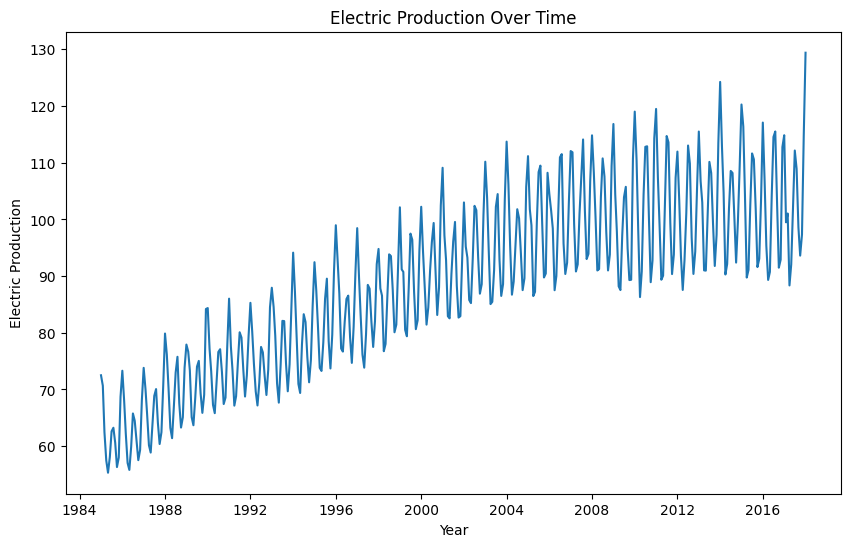

In [ ]:
import matplotlib.pyplot as plt
# Visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Value'])
plt.xlabel('Year')
plt.ylabel('Electric Production')
plt.title('Electric Production Over Time')
plt.show()


In [ ]:
from statsmodels.tsa.stattools import adfuller
 # Perform the Augmented Dickey-Fuller test
result = adfuller(data['Value'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
  print(key, ':', value)


ADF Statistic: -2.256990350047235
p-value: 0.1862146911658712
Critical Values:
1% : -3.4476305904172904
5% : -2.869155980820355
10% : -2.570827146203181


The ADF test helps determine if a time series is stationary or not. It provides the ADF statistic, p-value, and critical values for different significance levels.
After running the code, the ADF statistic, p-value, and critical values will be printed. If the p-value is less than a chosen significance level (e.g., 0.05), we
can reject the null hypothesis and conclude that the time series is stationary. Otherwise, if the p-value is greater than the significance level, we fail to
reject the null hypothesis, suggesting that the time series is non-stationary.

###         **Trend Analysis**

**Trend analysis** in time series forecasting refers to the process of identifying and understanding the long-term upward or downward movement in the
data. It helps to uncover the underlying direction or pattern in the time series, which can be valuable for forecasting and decision-making.
**To perform trend analysis on a time series, we can use various techniques, including visual inspection, moving averages, and regression
analysis.**
1. **Visual Inspection**: Plotting the time series data can often reveal the presence of a trend. A clear upward or downward movement over time
suggests the presence of a trend component. Visual inspection allows you to observe the overall pattern and identify any deviations or changes in
the series.
2. **Moving Averages**: Moving averages are widely used for trend analysis. They help smooth out short-term fluctuations in the data, making it easier to
identify the underlying trend. Common types of moving averages include the simple moving average (SMA), weighted moving average (WMA), and
exponential moving average (EMA).
**Here are the three common types of moving averages used for trend analysis:**
* **Simple Moving Average (SMA):** The
Simple Moving Average calculates the average of a specified number of data points over a defined
window. Each data point contributes equally to the average, and older observations are equally weighted as newer ones. The SMA provides a
smoothed representation of the data by reducing random fluctuations.
* **Weighted Moving Average (WMA):** The Weighted Moving Average assigns different weights to the data points within the window. The weights
can be linear or follow a specific pattern. The WMA gives more emphasis to recent observations, allowing it to respond more quickly to changes
in the data compared to the SMA.
* **Exponential Moving Average (EMA):** The Exponential Moving Average is a type of weighted moving average that assigns exponentially
decreasing weights to the data points. It places more weight on recent observations while gradually reducing the importance of older
observations. The EMA is more responsive to recent changes in the data and is often used in technical analysis.
3. **Regression Analysis:** Regression analysis can be applied to estimate and visualize the trend component of a time series. It involves fitting a
regression model to the data, where time is considered as an independent variable and the variable of interest is the dependent variable. The trend
component can then be extracted from the regression model.

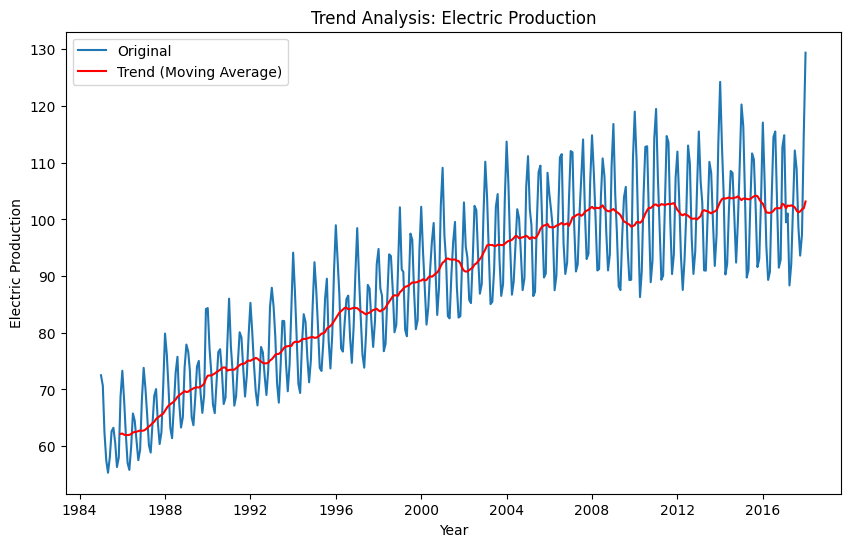

In [ ]:
# Calculate the rolling mean (simple moving average) with a window size of 12 months
rolling_mean = data['Value'].rolling(window=12).mean()
# Visualize the original time series and the trend component
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Value'], label='Original')
plt.plot(data.index, rolling_mean, color='red', label='Trend (Moving Average)')
plt.xlabel('Year')
plt.ylabel('Electric Production')
plt.title('Trend Analysis: Electric Production')
plt.legend()
plt.show()

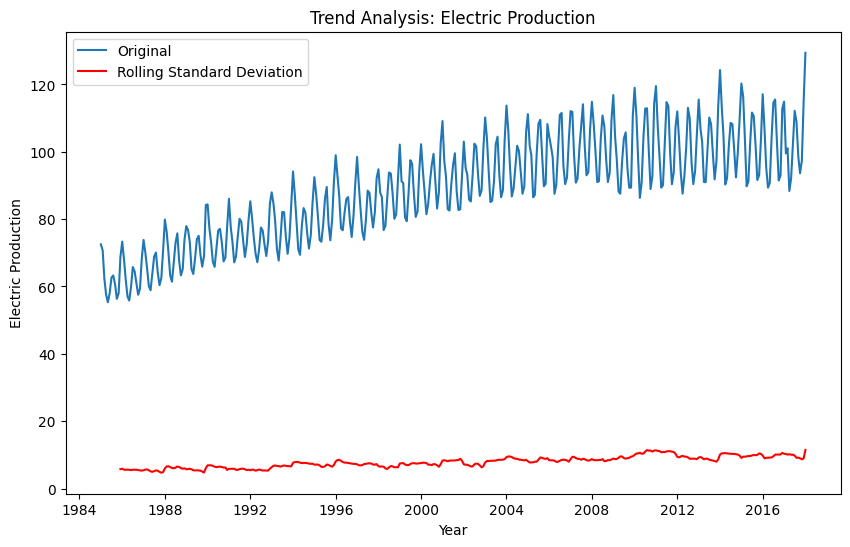

In [ ]:
 # Calculate the rolling SD with a window size of 12 months
rolstd = data.rolling(window=12).std()
# Visualize the original time series and the trend component
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Value'], label='Original')
plt.plot(data.index, rolstd, color='red', label='Rolling Standard Deviation')
plt.xlabel('Year')
plt.ylabel('Electric Production')
plt.title('Trend Analysis: Electric Production')
plt.legend()
plt.show()

The moving average is calculated using the rolling() function with a window size of 12 months. The rolling mean represents the trend component of the
time series. The original time series and the trend component are then plotted for visual analysis. </div>

# Seasonality

**Seasonality** in time series refers to the repetitive and predictable patterns that occur at fixed intervals within the data. It represents variations in the data
that are related to specific calendar periods, such as days, weeks, months, quarters, or years. Identifying seasonality is crucial for understanding the
cyclical patterns and making accurate forecasts.
**To detect and analyze seasonality in a time series, several techniques can be employed:**
1.** Seasonal Subseries Plot:** This plot helps visualize the seasonal patterns by dividing the data into individual seasons or calendar periods. It
displays subsets of the data corresponding to each season, allowing you to observe any recurring patterns or fluctuations.
2. **Autocorrelation Function (ACF) Plot: **The ACF plot shows the correlation between the time series and its lagged values. For a seasonal time
series, the ACF plot often exhibits significant spikes at regular intervals, indicating the presence of seasonality.
3. Seasonal Decomposition: Seasonal decomposition of time series (STL) is a method that separates a time series into its individual components:
trend, seasonality, and residual. This technique decomposes the series to better understand and analyze the seasonal component independently.

In [ ]:
import seaborn as sns

In [ ]:
# Create a new column for the month
data['Month'] = data.index.month
# Calculate the average value for each month across all years
monthly_avg = data.groupby('Month')['Value'].mean()

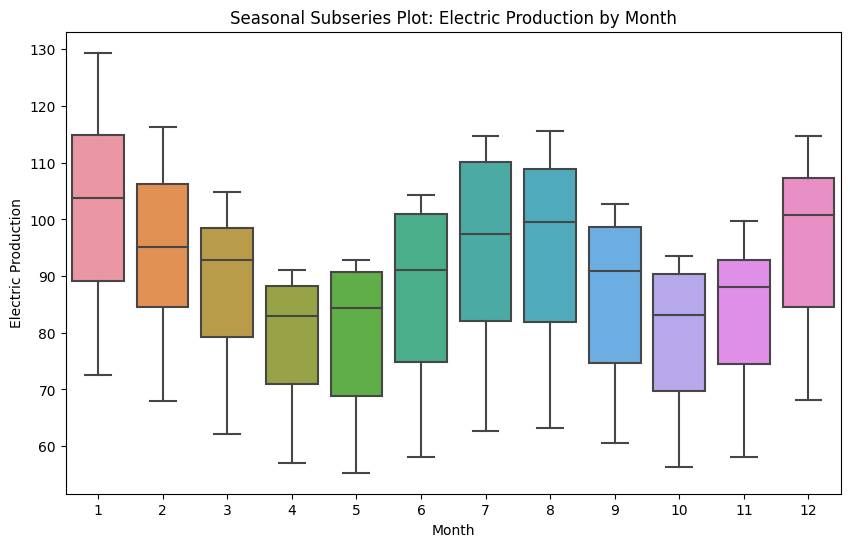

In [ ]:
 # Create a seasonal subseries plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Month'], y=data['Value'])
plt.xlabel('Month')
plt.ylabel('Electric Production')
plt.title('Seasonal Subseries Plot: Electric Production by Month')
plt.show()


# Autocorrelation

The Autocorrelation Function (ACF) is a mathematical tool used to measure the correlation between a time series and its lagged values. It quantifies
the relationship between an observation at a given time point and observations at previous time points.
The ACF provides information about the strength and direction of linear dependence between the values of a time series at different lags. It helps identify
any patterns or dependencies in the data. The ACF values range from -1 to 1, where:
* ACF value of 1 indicates a perfect positive correlation between the current observation and the lagged observation.
* ACF value of -1 indicates a perfect negative correlation between the current observation and the lagged observation.
* ACF value of 0 indicates no correlation between the current observation and the lagged observation.

By plotting the ACF values against different lags, we can analyze the autocorrelation structure of the time series and identify any significant patterns or dependencies.

The ACF plot visually represents the ACF values for different lags. It helps to determine the presence of seasonality, trend, or other autocorrelation
patterns in the data. By analyzing the ACF plot, we can gain insights into the time series behavior and select appropriate models for forecasting or
further analysis.
So, the Autocorrelation Function (ACF) is a tool to measure and visualize the correlation between a time series and its lagged values, providing valuable
information about the temporal dependencies within the data.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

<Figure size 1000x600 with 0 Axes>

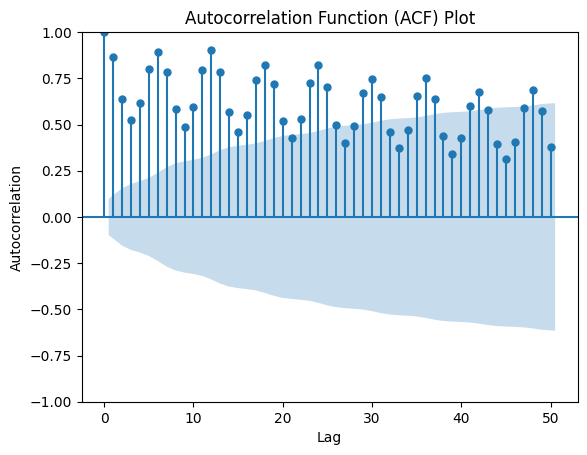

In [ ]:
 # Generate the ACF plot
plt.figure(figsize=(10, 6))
plot_acf(data['Value'], lags=50)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()


PACF stands for Partial Autocorrelation Function. It is a statistical tool used in time series analysis to identify the direct relationship between an
observation and its lagged values, after accounting for the effects of the intermediate lags.
The PACF measures the correlation between a time series and its lagged values, while controlling for the effects of the intervening lags. It helps
determine the number of autoregressive terms (AR terms) in an Autoregressive Integrated Moving Average (ARIMA) model.
In the context of time series forecasting, the PACF plot is used to identify the significant lag values that contribute to the prediction of the time series. It
helps determine the order of the autoregressive (AR) component of the ARIMA model.


In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

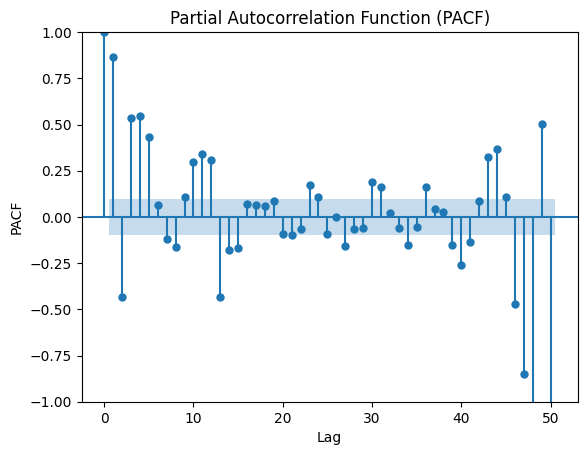

In [ ]:
 # Calculate the PACF
plt.figure(figsize=(10, 6))
plot_pacf(data['Value'], lags =50)
plt.xlabel('Lag')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

# Decomposition

Decomposition is a technique used in time series analysis to break down a time series into its individual components, namely trend, seasonality, and
residual (or error). It allows us to understand the underlying patterns and characteristics of the time series, making it easier to analyze and forecast.
There are different types of decompositions commonly used in time series analysis:
1. **Additive Decomposition:** In additive decomposition, the time series is expressed as the sum of its individual components: trend, seasonality, and
residual. It assumes that the magnitude of the seasonal fluctuations remains constant throughout the time series.
2. **Multiplicative Decomposition:** In multiplicative decomposition, the time series is expressed as the product of its individual components: trend,
seasonality, and residual. It assumes that the seasonal fluctuations vary proportionally with the level of the time series.
**Decomposition can be performed using various methods**, including:
1. **Classical Decomposition:** The classical decomposition method separates the time series into its trend, seasonality, and residual components
using techniques such as moving averages, differencing, and mathematical modeling.
2. **Seasonal and Trend decomposition using LOESS (STL):** STL is a robust method that decomposes a time series into its trend, seasonality, and
residual components using locally weighted regression. It handles irregularities and outliers in the data effectively.
3. **Seasonal decomposition of time series using moving averages (SMA):** SMA decomposition applies moving averages to identify the trend and
seasonality components in the time series. It can be used when the time series exhibits clear seasonality patterns.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

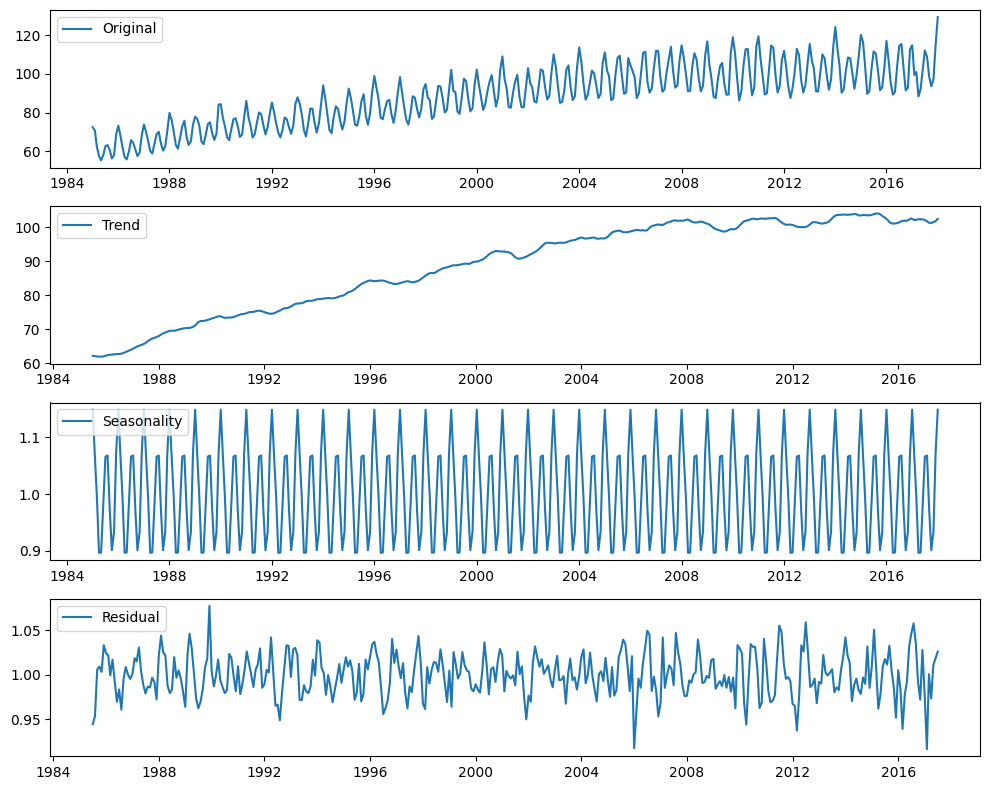

In [ ]:
# Perform seasonal decomposition
decomposition = seasonal_decompose(data['Value'], model='multiplicative')
# Plot the decomposition components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(data['Value'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 2. Time Series Forecasting

# Moving Averages

Moving averages are a simple and widely used method for trend analysis. They smooth out short-term fluctuations in the data, making it easier to identify
the underlying trend. The most common type of moving average is the Simple Moving Average (SMA), which calculates the average of a fixed window of
past values. It is useful for detecting trends over a specific period of time.

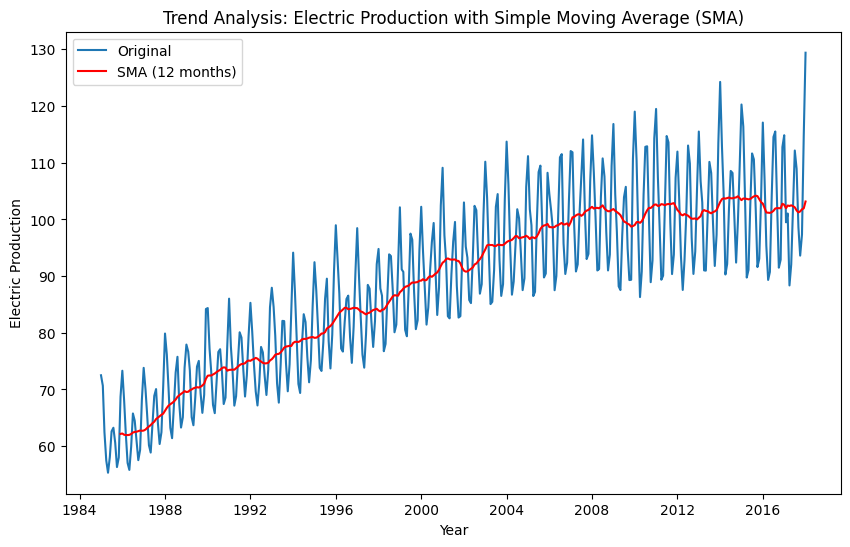

In [ ]:
 # Calculate the Simple Moving Average with a window size of 12 months
sma = data['Value'].rolling(window=12).mean()
# Visualize the original time series and the SMA
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Value'], label='Original')
plt.plot(data.index, sma, color='red', label='SMA (12 months)')
plt.xlabel('Year')
plt.ylabel('Electric Production')
plt.title('Trend Analysis: Electric Production with Simple Moving Average (SMA)')
plt.legend()
plt.show()


# Exponential Sooting

Exponential Smoothing is a time series forecasting method that assigns exponentially decreasing weights to past observations. It is based on the
principle that recent observations are more relevant for forecasting than older ones. Exponential smoothing methods, such as the Simple Exponential
Smoothing (SES), give more weight to recent data points and are suitable for data with no significant trend or seasonality.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


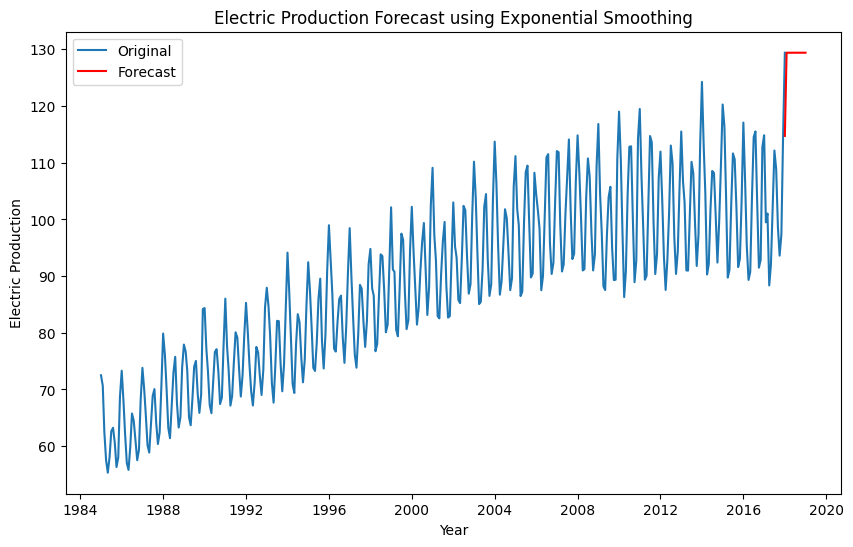

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
# Apply exponential smoothing
model = SimpleExpSmoothing(data['Value'])
fitted_model = model.fit()
forecast = fitted_model.predict(start=data.index[-1], end=data.index[-1] + pd.DateOffset(months=12))
# Visualize the original time series and the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Value'], label='Original')
plt.plot(forecast, color='red', label='Forecast')
plt.xlabel('Year')
plt.ylabel('Electric Production')
plt.title('Electric Production Forecast using Exponential Smoothing')
plt.legend()
plt.show()

# ARIMA - Autoregressive Integrated Moving Average
ARIMA is a popular forecasting model that combines autoregressive (AR), differencing (I), and moving average (MA) components. It is effective for
capturing linear trends and seasonality in the data. ARIMA models require the data to be stationary, which means that the mean and variance of the
series remain constant over time. If the data is not stationary, differencing can be applied to make it stationary before fitting the model.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


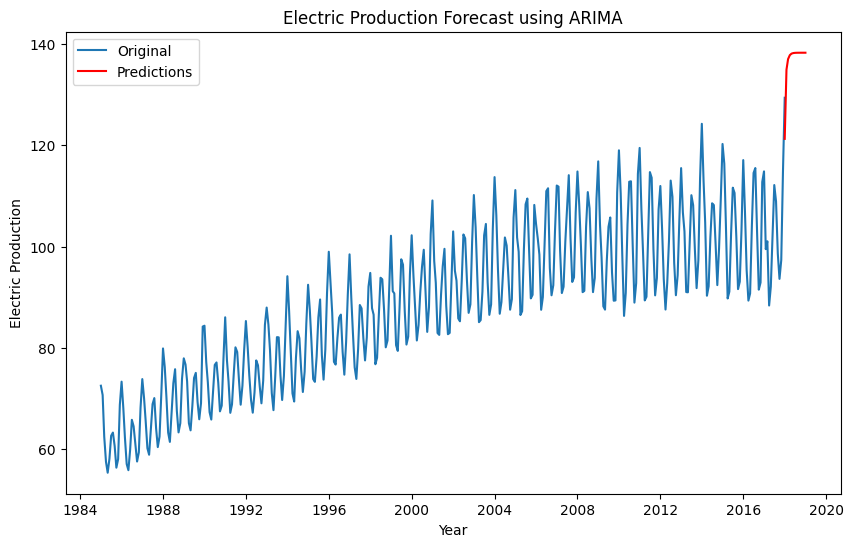

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# Fit the ARIMA model
model = ARIMA(data['Value'], order=(1, 1, 0))
fitted_model = model.fit()
# Make predictions
predictions = fitted_model.predict(start=data.index[-1], end=data.index[-1] + pd.DateOffset(months=12))
# Visualize the original time series and the predictions
plt.figure(figsize=(10, 6))
plt.plot(data['Value'], label='Original')
plt.plot(predictions, color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Electric Production')
plt.title('Electric Production Forecast using ARIMA')
plt.legend()
plt.show()

# SARIMA - Seasonal ARIMA
SARIMA is an extension of the ARIMA model that incorporates seasonality in the data. It includes additional seasonal components to capture recurring
patterns at fixed intervals (e.g., monthly, quarterly, yearly). SARIMA models are useful for time series with significant seasonal variations. The seasonal
components are specified by the seasonal order parameter, which represents the seasonal AR, differencing, and MA terms.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


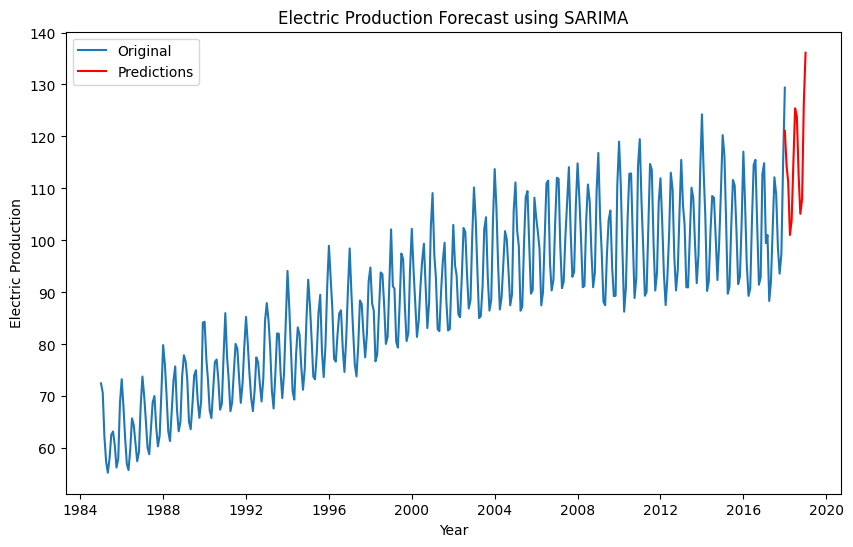

In [ ]:
 from statsmodels.tsa.statespace.sarimax import SARIMAX
# Fit the SARIMA model
model = SARIMAX(data['Value'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 12))
fitted_model = model.fit()
# Make predictions
predictions = fitted_model.predict(start=data.index[-1], end=data.index[-1] + pd.DateOffset(months=12))
# Visualize the original time series and the predictions
plt.figure(figsize=(10, 6))
plt.plot(data['Value'], label='Original')
plt.plot(predictions, color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Electric Production')
plt.title('Electric Production Forecast using SARIMA')
plt.legend()
plt.show()


# Seasonal Decomposition of Time Series (STL)
STL is a decomposition technique that separates a time series into its three main components: trend, seasonality, and residual. It is helpful for
understanding the underlying patterns and characteristics of the data. STL decomposes the time series using locally weighted regression and handles
irregularities and outliers effectively. It provides a clearer view of the individual components and their contributions to the overall behavior of the time
series.

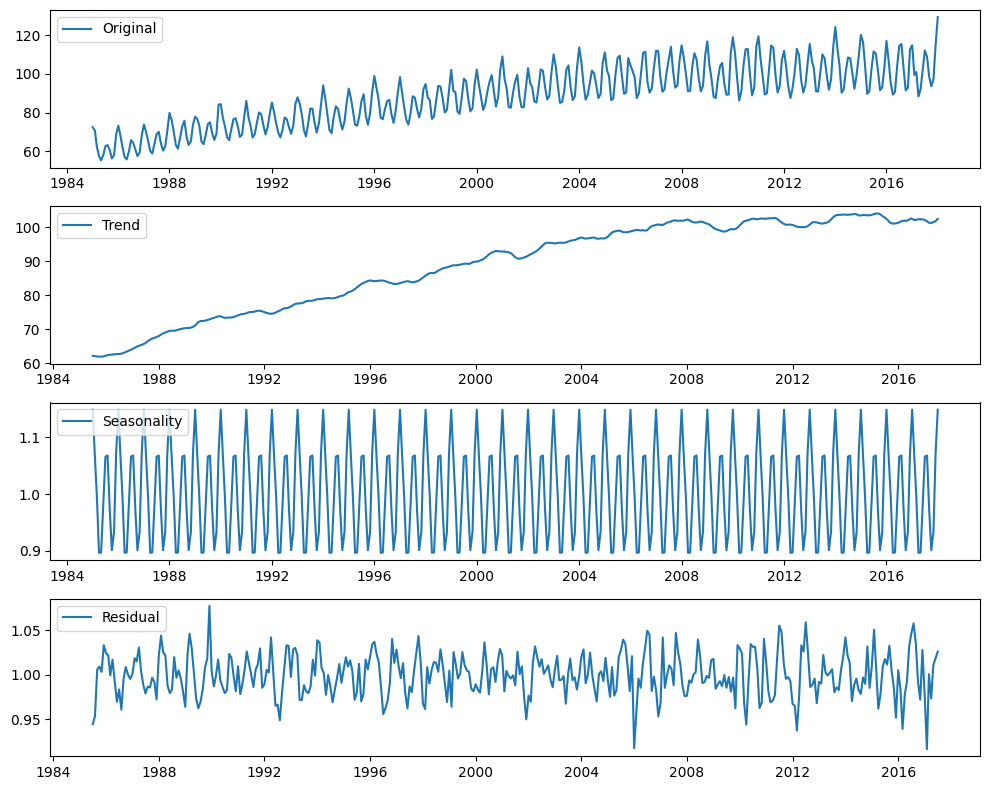

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
# Perform seasonal decomposition
decomposition = seasonal_decompose(data['Value'], model='multiplicative')
# Plot the decomposition components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(data['Value'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

These forecasting methods/models offer different approaches for analyzing and predicting time series data. The choice of model depends on the
characteristics of the data, the presence of trends or seasonality, and the specific requirements of the forecasting task. It's essential to assess the
performance of each model and select the one that best fits the data and yields accurate predictions